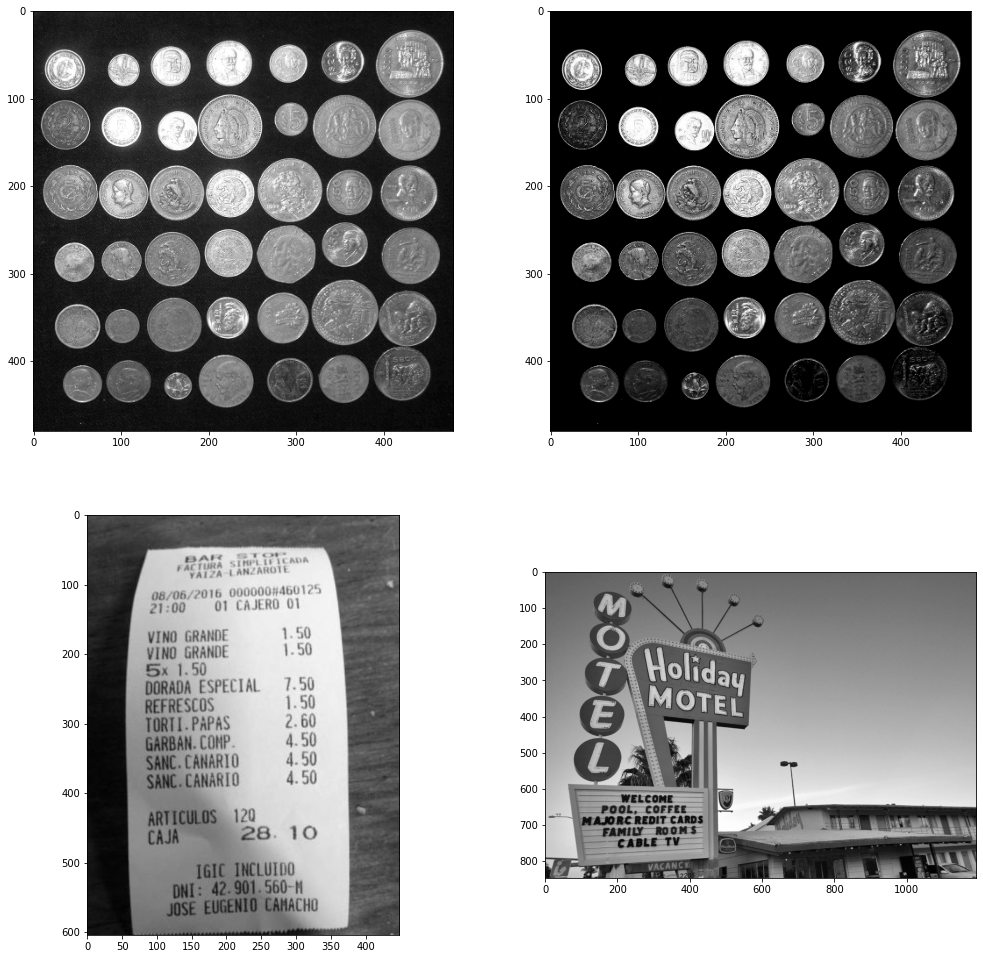

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

coins_1 = np.asarray(Image.open("./images/monedas1.png").convert("L"))
coins_2 = np.asarray(Image.open("./images/monedas2.png").convert("L"))
ticket = np.asarray(Image.open("./images/ticket.png").convert("L"))
holiday = np.asarray(Image.open("./images/holiday.png").convert("L"))

fig, ax = plt.subplots(2, 2, figsize=(17, 17))
ax[0][0].imshow(coins_1, cmap="gray")
ax[0][1].imshow(coins_2, cmap="gray")
ax[1][0].imshow(ticket, cmap="gray")
ax[1][1].imshow(holiday, cmap="gray")

In [4]:
class VLine:
  size = 3
  def __call__(self, area):
    elements = [
        area[0][1],
        area[1][1],
        area[2][1],
    ]
    return elements

class HLine:
  size = 3
  def __call__(self, area):
    elements = [
        area[1][0], area[1][1], area[1][2],
    ]
    return elements

class VCross:
  size = 3
  def __call__(self, area):
    elements = [
                    area[0][1],
        area[1][0], area[1][1], area[1][2],
                    area[2][1]
    ]
    return elements

class HCross:
  size = 3
  def __call__(self, area):
    elements = [
        area[0][0],             area[0][2],
                    area[1][1],
        area[2][0],             area[2][2],
    ]
    return elements

class Square:
  size = 3
  def __call__(self, area):
    elements = [
        area[0][0], area[0][1], area[0][2],
        area[1][0], area[1][1], area[1][2],
        area[2][0], area[2][1], area[2][2],
    ]
    return elements

class Diamond:
  size = 5
  def __call__(self, area):
    elements = [
                                area[0][2],
                    area[1][1], area[1][2], area[1][3],
        area[2][0], area[2][1], area[2][2], area[2][3], area[2][4],
                    area[3][1], area[3][2], area[3][3],
                                area[4][2],
    ]
    return elements

class HEllipse:
  size = 5
  def __call__(self, area):
    elements = [
                                area[0][2],
        area[1][0], area[1][1], area[1][2], area[1][3], area[1][4],
        area[2][0], area[2][1], area[2][2], area[2][3], area[2][4],
        area[3][0], area[3][1], area[3][2], area[3][3], area[3][4],
                                area[4][2],
    ]
    return elements

class VEllipse:
  size = 5
  def __call__(self, area):
    elements = [
                    area[0][1], area[0][2], area[0][3],
                    area[1][1], area[1][2], area[1][3],
        area[2][0], area[2][1], area[2][2], area[2][3], area[2][4],
                    area[3][1], area[3][2], area[3][3],
                    area[4][1], area[4][2], area[4][3],
    ]
    return elements

class Circle7:
  size = 7
  def __call__(self, area):
    elements = [
                                area[0][2], area[0][3], area[0][4],
                    area[1][1], area[1][2], area[1][3], area[1][4], area[1][5],
        area[2][0], area[2][1], area[2][2], area[2][3], area[2][4], area[2][5], area[2][6],
        area[3][0], area[3][1], area[3][2], area[3][3], area[3][4], area[3][5], area[3][6],
        area[4][0], area[4][1], area[4][2], area[4][3], area[4][4], area[4][5], area[4][6],
                    area[5][1], area[5][2], area[5][3], area[5][4], area[5][5],
                                area[6][2], area[6][3], area[6][4],
    ]
    return elements

class Circle9:
  size = 11
  def __call__(self, area):
    elements = [
                                                        area[0][4],
                                area[1][2], area[1][3], area[1][4], area[1][5], area[1][6],
                    area[2][1], area[2][2], area[2][3], area[2][4], area[2][5], area[2][6], area[2][7],
                    area[3][1], area[3][2], area[3][3], area[3][4], area[3][5], area[3][6], area[3][7],
        area[4][0], area[4][1], area[4][2], area[4][3], area[4][4], area[4][5], area[4][6], area[4][7], area[4][8],
                    area[5][1], area[5][2], area[5][3], area[5][4], area[5][5], area[5][6], area[5][7],
                    area[6][1], area[6][2], area[6][3], area[6][4], area[6][5], area[6][6], area[6][7],
                                area[7][2], area[7][3], area[7][4], area[7][5], area[7][6],
                                                        area[8][4],
    ]
    return elements
  
class Circle11:
  size = 11
  def __call__(self, area):
    elements = [
                                                        area[0][4], area[0][5], area[0][6],
                                area[1][2], area[1][3], area[1][4], area[1][5], area[1][6], area[1][7], area[1][8],
                    area[2][1], area[2][2], area[2][3], area[2][4], area[2][5], area[2][6], area[2][7], area[2][8], area[2][9],
                    area[3][1], area[3][2], area[3][3], area[3][4], area[3][5], area[3][6], area[3][7], area[3][8], area[3][9],
        area[4][0], area[4][1], area[4][2], area[4][3], area[4][4], area[4][5], area[4][6], area[4][7], area[4][8], area[4][9], area[4][10],
        area[5][0], area[5][1], area[5][2], area[5][3], area[5][4], area[5][5], area[5][6], area[5][7], area[5][8], area[5][9], area[5][10],
        area[6][0], area[6][1], area[6][2], area[6][3], area[6][4], area[6][5], area[6][6], area[6][7], area[6][8], area[6][9], area[6][10],
                    area[7][1], area[7][2], area[7][3], area[7][4], area[7][5], area[7][6], area[7][7], area[7][8], area[7][9],
                    area[8][1], area[8][2], area[8][3], area[8][4], area[8][5], area[8][6], area[8][7], area[8][8], area[8][9],
                                area[9][2], area[9][3], area[9][4], area[9][5], area[9][6], area[9][7], area[9][8],
                                                        area[10][4],area[10][5],area[10][6],
    ]
    return elements

class Dilate:
  def __call__(self, kernel, area):
    return 255 if any(kernel(area)) else 0

class Erode:
  def __call__(self, kernel, area):
    return 255 if all(kernel(area)) else 0

def binaryze(image, threshold, inv=False):
  if inv:
    return np.where(image > threshold, 0, 255)
  return np.where(image > threshold, 255, 0)

def add_padding_to(layer, size: int=1):
  rows, columns = layer.shape
  zero_row = np.zeros((1, columns))
  for _ in range(size):
    layer = np.vstack([zero_row, layer])
    layer = np.vstack([layer, zero_row])
  zero_column = np.zeros((rows+2*size, 1))
  for _ in range(size):
    layer = np.hstack([layer, zero_column])
    layer = np.hstack([zero_column, layer])
  return layer

def transform(image, kernel, operation, times=1):
  rows, columns = image.shape
  for _ in range(times):
    padded_image = add_padding_to(image, (kernel.size-1)//2)
    new_image = np.copy(image)
    for i in range(rows):
      for j in range(columns):
        new_image[i,j] = operation(kernel, padded_image[i:i+kernel.size,j:j+kernel.size])
    image = new_image
  return new_image

def opening(image, kernel):
  return transform(transform(image, kernel, Erode()), kernel, Dilate())

def closing(image, kernel):
  return transform(transform(image, kernel, Dilate()), kernel, Erode())

def white_top_hat(image, kernel):
  return image - opening(image, kernel)

def black_top_hat(image, kernel):
  return closing(image, kernel) - image

def morphological_gradient(image, kernel):
  gradient = transform(image, kernel, Dilate()) - transform(image, kernel, Erode())
  return np.where(gradient > 0, gradient, 0)

def skeleton(image, kernel):
  skeleton = np.zeros(image.shape, dtype=np.uint8)
  while True:
    difference = np.maximum(image - opening(image, kernel), 0)
    skeleton = skeleton | difference
    image = transform(image, kernel, Erode())
    if np.all((image == 0)):
      return skeleton
  return image

def process(image, operations):
  for operation, kernel in operations:
    image = transform(image, kernel, operation)
  return image

def label_objects(image, kernel):
  rows, columns = image.shape
  padded_image = add_padding_to(image, (kernel.size-1)//2)
  new_image = np.copy(image)
  labels = [2]
  for i in range(rows):
    for j in range(columns):
      result = np.all(arr == arr[0])
      new_image[i,j] = operation(kernel, padded_image[i:i+kernel.size,j:j+kernel.size])
  return new_image

def plot_images(images, cmap="gray"):
  fig, axs = plt.subplots(1, len(images), figsize=(20, 30))
  for i in range(len(images)):
    axs[i].imshow(images[i], cmap=cmap)

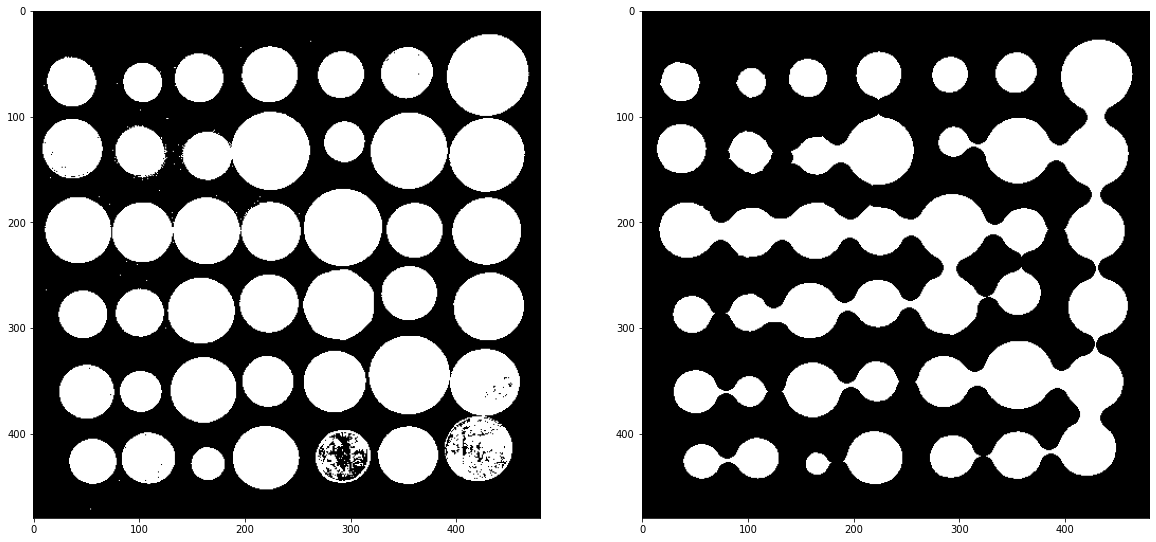

In [24]:
coins_1_bin = binaryze(coins_1, 117)
#coins_1_border = morphological_gradient(coins_1_bin, Circle11())
coins_1_result = process(coins_1_bin, [
  (Dilate(), Circle11()),
  (Erode(), Circle11()),
  (Erode(), Circle11()),
])
plot_images([coins_1_bin, coins_1_result])

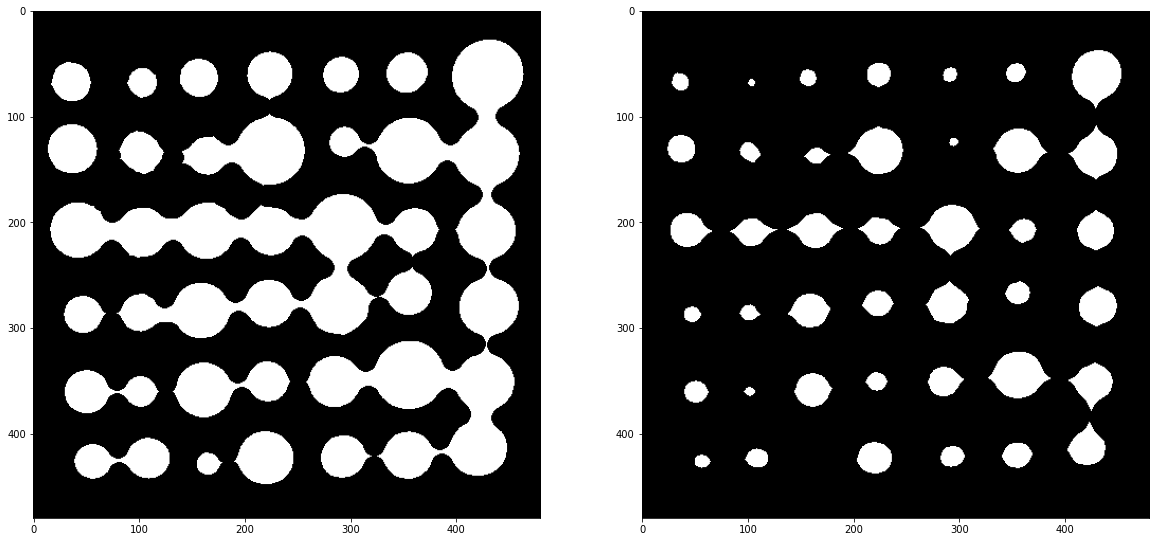

In [74]:
coins_1_result_2 = process(coins_1_result, [
  (Erode(), Circle11()),
  (Erode(), Circle11()),
])
plot_images([coins_1_result, coins_1_result_2])

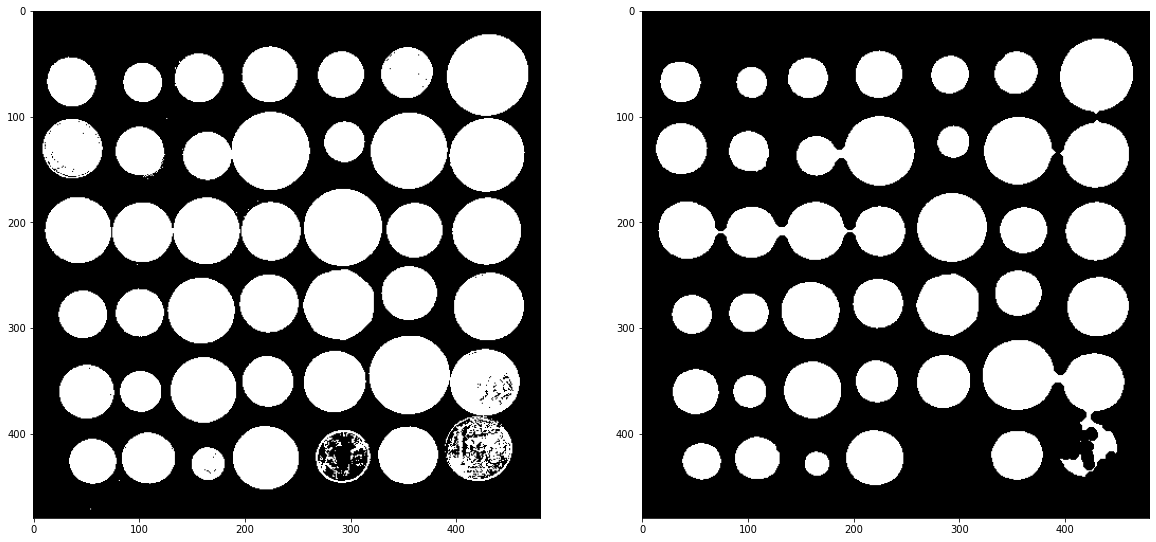

In [58]:
coins_2_bin = binaryze(coins_2, 10)
coins_2_result = process(coins_2_bin, [
  (Dilate(), HCross()),
  (Erode(), Circle7()),
  (Dilate(), VCross()),
  (Erode(), Circle7()),
])
plot_images([coins_2_bin, coins_2_result])

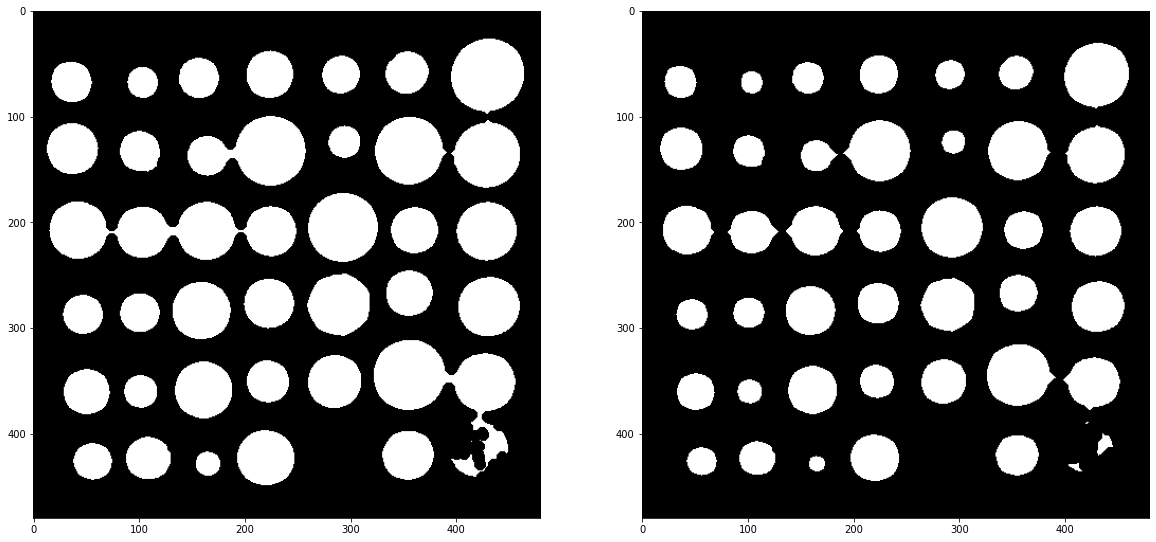

In [66]:
coins_2_result_2 = process(coins_2_result, [
  (Erode(), VCross()),
  (Erode(), Circle7()),
])
plot_images([coins_2_result, coins_2_result_2])

In [75]:
def is_safe(i, j, visited, height, width, image):
    return (i >= 0 and i < height and
            j >= 0 and j < width and
            not visited[i][j] and image[i][j])

def DFS(i, j, visited, height, width, image):
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1];
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1];
    visited[i][j] = True
    for k in range(8):
        if is_safe(i + rowNbr[k], j + colNbr[k], visited, height, width, image):
            DFS(i + rowNbr[k], j + colNbr[k], visited, height, width, image)

def count_elements_in_image(image: np.ndarray):
    height, width = image.shape
    visited = [[False for _ in range(height)]for _ in range(width)]
    count = 0
    for i, row in enumerate(image):
        for j, col in enumerate(row):
            if visited[i][j] == 0 and col > 0:
                DFS(i, j, visited, height, width, image)
                count += 1
    return count

print(count_elements_in_image(coins_1_result_2))
print(count_elements_in_image(coins_2_result_2))

41
43


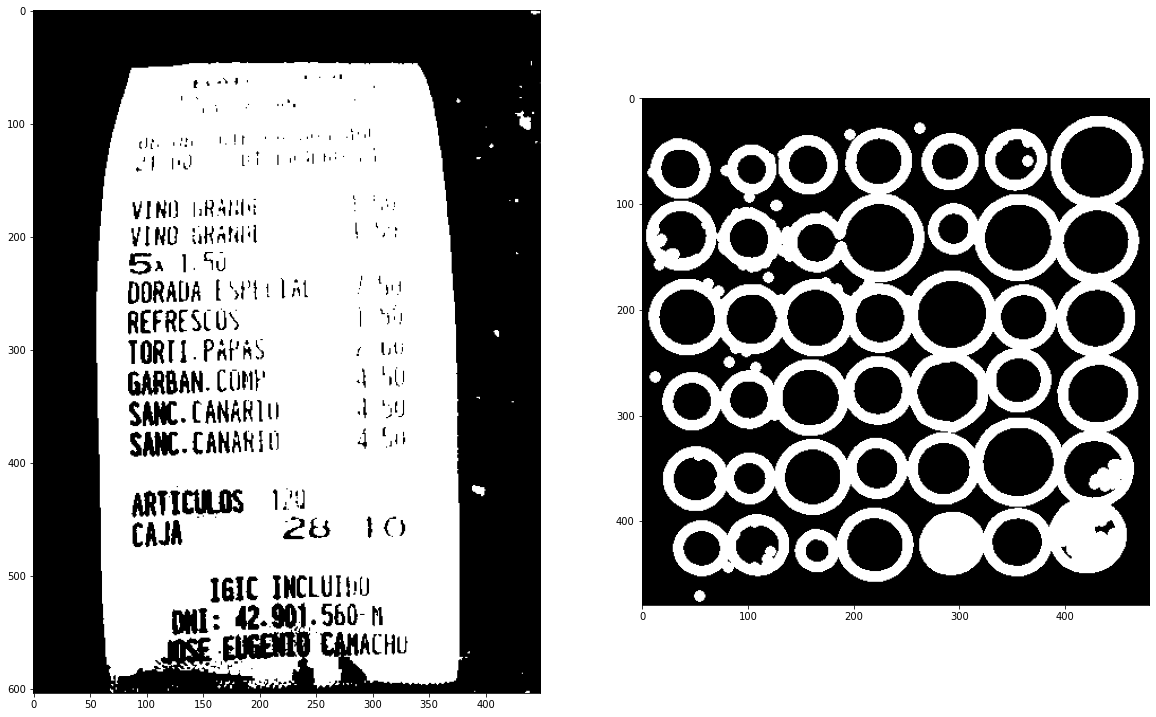

In [100]:
ticket_bin = binaryze(ticket, 117)
ticket_border = morphological_gradient(coins_1_bin, Circle11())
plot_images([ticket_bin, ticket_border])

In [ ]:
ticket_result = process(ticket_bin, [
  (Dilate(), Circle11()),
  (Erode(), Circle11()),
  (Erode(), Circle11()),
])

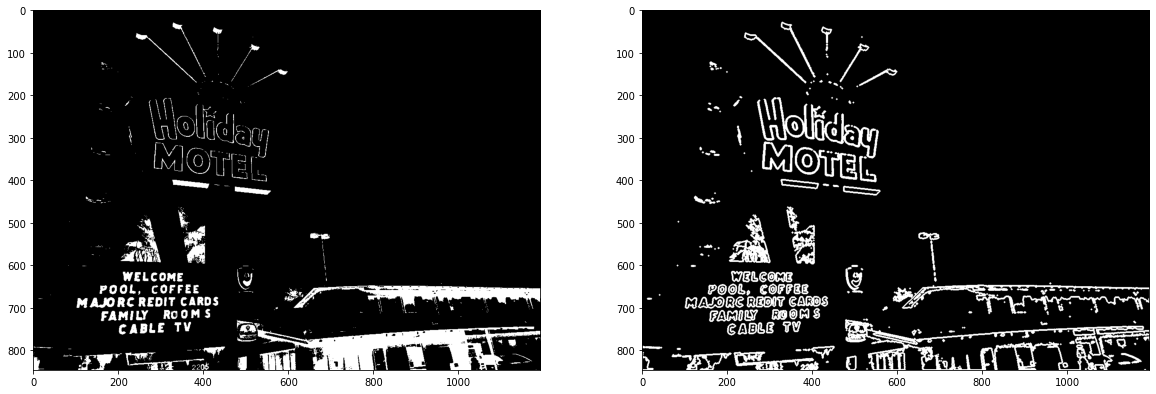

In [98]:
holiday_bin = binaryze(holiday, 45, inv=True)
holiday_border = morphological_gradient(holiday_bin, Diamond())
plot_images([holiday_bin, holiday_border])

In [ ]:
holiday_result = process(holiday_border, [
  (Dilate(), Circle11()),
  (Erode(), Circle11()),
  (Erode(), Circle11()),
])